In [2]:
from torch import nn, optim 
import torch 
import numpy as np 
import matplotlib.pyplot as plt 

from mpl_toolkits.mplot3d import Axes3D 
from torch.utils.data import Dataset, DataLoader 
torch.manual_seed(1)

In [3]:
# Make some data (2D Dataset) 

class Data2D(Dataset): 
    def __init__(self): 
        # Create 2D tensor with 20 rows and 2 columnsm initialized with zeros 
        self.x = torch.zeros(20, 2) 
        # Creates a 1D tensor ranging from -1 to 1, (exclusive), with a step size of 0.1 
        # 20 values [-1.0, -0.9, ..., 0.9]
        # [:, 0] Selects all rows in the first column 
        self.x[:, 0] = torch.arange(-1, 1, 0.1) 
        # [:, 1] Selects all rows in the second column
        self.x[:, 1] = torch.arange(-1, 1, 0.1) 
        self.w = torch.tensor([[1.0], [1.0]]) 
        self.b = 1 
        self.f = torch.mm(self.x, self.w) + self.b 
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1)) 
        self.len = self.x.shape[0] 
    
    # Getter 
    def __getitem__(self, index): 
        return self.x[index], self.y[index] 

    # Get length 
    def __len__(self): 
        return self.len 

In [4]:
data_set = Data2D() 

In [9]:
# Create custom linear regression 
class LinearRegression(nn.Module): 
    # Constructor 
    def __init__(self, input_size, output_size): 
        super(LinearRegression, self).__init__() 
        self.linear = nn.Linear(input_size, output_size) 
    
    # Prediction 
    def forward(self, x): 
        return self.linear(x)

In [10]:
# Create a model, input size: 2, output size: 1 
model = LinearRegression(input_size=2, output_size=1) 
print(f"Parameters: {list(model.parameters())}")
print(f"Dict: {model.state_dict()}")

Parameters: [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]
Dict: OrderedDict([('linear.weight', tensor([[ 0.6209, -0.1178]])), ('linear.bias', tensor([0.3026]))])


In [12]:
# Optimizer: Stochastic Gradient Descent 
optimizer = optim.SGD(model.parameters(), lr=0.1) 

In [13]:
# Create Cost function: Mean Squared Error 
criterion = nn.MSELoss()

In [14]:
# Create a data loader object and set the batch_size equal to 2 
train_loader = DataLoader(dataset=data_set, batch_size=2)

In [31]:
# Plot Class 
def plot_2d_plane(model, dataset, n=0): 
    w1, w2 = model.state_dict()['linear.weight'].numpy()[0]
    b = model.state_dict()['linear.bias'].numpy() 

    # data 
    x1 = dataset.x[:, 0].view(-1, 1).numpy() 
    x2 = dataset.x[:, 1].view(-1, 1).numpy() 
    y = dataset.y.numpy() 

    # Make plane 
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05)) 
    y_hat = w1 * X + w2 * Y + b 

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, y_hat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

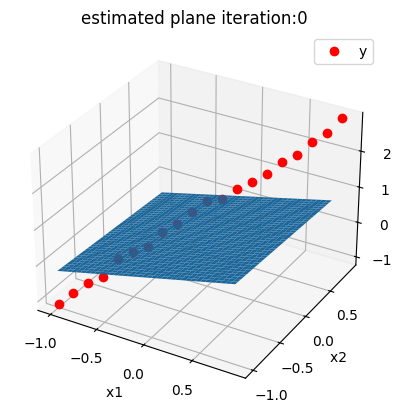

In [32]:
# Train the model via mini batch gradient descent 
LOSS = [] 
plot_2d_plane(model, data_set) 


After Training: 


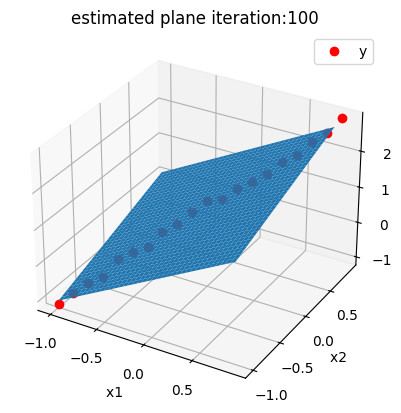

In [34]:
def train_model(num_epochs): 
    for epoch in range(num_epochs): 
        for x, y in train_loader: 
            y_hat = model(x) 
            loss = criterion(y_hat, y) 
            LOSS.append(loss.item()) 
            optimizer.zero_grad() 
            loss.backward() 
            optimizer.step() 
train_model(num_epochs=100)
print(f"After Training: ") 
plot_2d_plane(model, data_set, 100)

Text(0, 0.5, 'Cost/Total Loss')

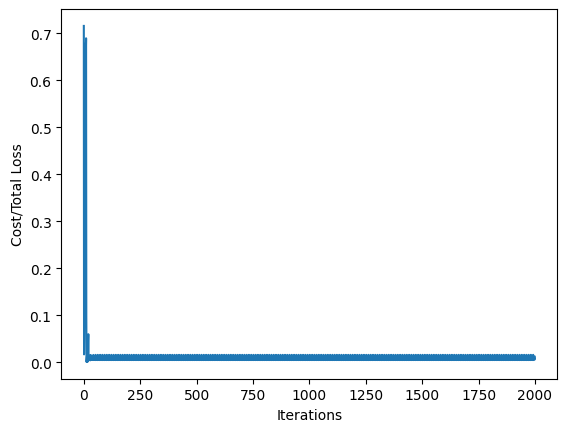

In [35]:
plt.plot(LOSS)
plt.xlabel("Iterations") 
plt.ylabel("Cost/Total Loss")